<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/Recognize_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#Khai báo các thư viện cần sử dụng
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [14]:
#Kết nối Colab với Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
folder='/content/drive/MyDrive/TRI_TUE_NHAN_TAO/FLOWERS/'

In [16]:
photos,labels = list(),list()
output = 0.0
for file in listdir(folder):
      if file.startswith('hoabanglang'):
        output=0.0
      if file.startswith('hoacuctrang'):
        output=1.0
      if file.startswith('hoahong'):
        output=2.0
      if file.startswith('hoamai'):
        output=3.0
      if file.startswith('hoasen'):
        output=4.0

      photo = load_img(folder+file,target_size=(50,50))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)

In [17]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/photo_flowers.npy',photos)
save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/label_flowers.npy',labels)
#Kiểm tra kích thước
print("kich thuoc photos",photos.shape)
print("kich thuoc labels",labels.shape)

kich thuoc photos (1000, 50, 50, 3)
kich thuoc labels (1000,)


In [18]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.2, train_size=0.8)
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc test_x",test_x.shape)

kich thuoc train_x (800, 50, 50, 3)
kich thuoc test_x (200, 50, 50, 3)


In [19]:
#Scale lại data
train_x = train_x.astype('float32')
train_x = train_x/255
     
test_x = test_x.astype('float32')
test_x = test_x/255

In [20]:
from keras.utils import to_categorical
train_labels = to_categorical(train_y)
test_labels = to_categorical(test_y)

In [21]:
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc train_labels",train_labels.shape)

kich thuoc train_x (800, 50, 50, 3)
kich thuoc train_labels (800, 5)


In [22]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(50,50,3),padding='same'))
     
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [23]:
classes = 5

model.add(Flatten())
     
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                  

In [25]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

batch_size = 64
epochs = 20

train = model.fit(train_x,train_labels,batch_size, epochs,verbose=2)
test_loss, test_acc = model.evaluate(test_x, test_labels)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

13/13 - 0s - loss: 0.0352 - accuracy: 0.9937 - 110ms/epoch - 8ms/step
Epoch 15/20
13/13 - 0s - loss: 0.0368 - accuracy: 0.9862 - 108ms/epoch - 8ms/step
Epoch 16/20
13/13 - 0s - loss: 0.0394 - accuracy: 0.9850 - 105ms/epoch - 8ms/step
Epoch 17/20
13/13 - 0s - loss: 0.0231 - accuracy: 0.9962 - 143ms/epoch - 11ms/step
Epoch 18/20
13/13 - 0s - loss: 0.0200 - accuracy: 0.9950 - 162ms/epoch - 12ms/step
Epoch 19/20
13/13 - 0s - loss: 0.0186 - accuracy: 0.9962 - 109ms/epoch - 8ms/step
Epoch 20/20
13/13 - 0s - loss: 0.0105 - accuracy: 0.9975 - 106ms/epoch - 8ms/step
7/7 [==============================] - 0s 22ms/step - loss: 0.3367 - accuracy: 0.9250
Accuracy: 0.925000011920929
Loss: 0.3366745412349701


In [26]:
model.save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/recognize_flowers.h5')


1/1 [==============================] - 0s 18ms/step


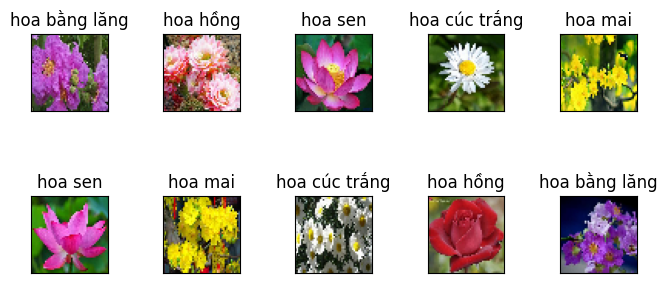

In [44]:
#test mo hinh

import matplotlib.pyplot as plt
import numpy as np

labels = ['hoa bằng lăng', 'hoa cúc trắng','hoa hồng','hoa mai','hoa sen']

for i in range(0 , 10):
    plt.subplot(3, 5, i+1)
    plt.tight_layout()
    img = load_img('/content/drive/My Drive/IMAGES/FLOWER' + str(i+1) + '.jpg', target_size=(50, 50))
    plt.imshow(img)
    img = img_to_array(img)
    img = img.reshape(1, 50, 50, 3)
    img = img.astype('float32') / 255
    predicted_label = labels[model.predict(img).argmax()]
    plt.title("{}".format(predicted_label))
    plt.xticks([])
    plt.yticks([])
plt.show()
